In [1]:
import joblib
predictions = joblib.load('y_preds')
true_labels = joblib.load('y_true')

In [4]:
def create_label_lookups(true):
    all_l2i = []
    all_i2l = []
    for labels in true:
        l2i = {}
        i2l = {}
        for i, label in enumerate(set(labels)):
            l2i[label] = i
            i2l[i] = label
        all_l2i.append(l2i)
        all_i2l.append(i2l)
    
    return all_l2i, all_i2l

In [6]:
all_label2index, all_index2label = create_label_lookups(true_labels)

In [5]:
len(true_labels), len(predictions)

(401, 401)

In [25]:
labels = ['OTHER_PERSON', 'GPE', 'PROVISION', 'WITNESS', 'O', 'RESPONDENT', 'DATE', 'COURT', 'CASE_NUMBER', 'JUDGE', 'STATUTE', 'PETITIONER', 'ORG', 'PRECEDENT']

In [26]:
def decode_labels(y_test, y_preds, labels=labels):
    new_true = []
    new_preds = []
    for true, pred in zip(y_test, y_preds):
        for i in range(len(true)):
            new_true.append(true[i])
            new_preds.append(pred[i] if pred[i] in labels else 'O')
    return new_true, new_preds

In [27]:
y_test, y_preds = decode_labels(true_labels, predictions)

In [28]:
len(y_test), len(y_preds)

(22233, 22233)

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [30]:
import matplotlib.pyplot as plt

In [31]:
def plot_confusion_matrix(y_preds, y_true, labels):
  cm = confusion_matrix(y_true, y_preds,normalize='true')
  fig, ax = plt.subplots(figsize=(10, 10))
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
  disp.plot(cmap="PuRd", values_format=".2f", ax=ax, colorbar=True, xticks_rotation='vertical')
  plt.title("Normalized confusion matrix")
  plt.show()

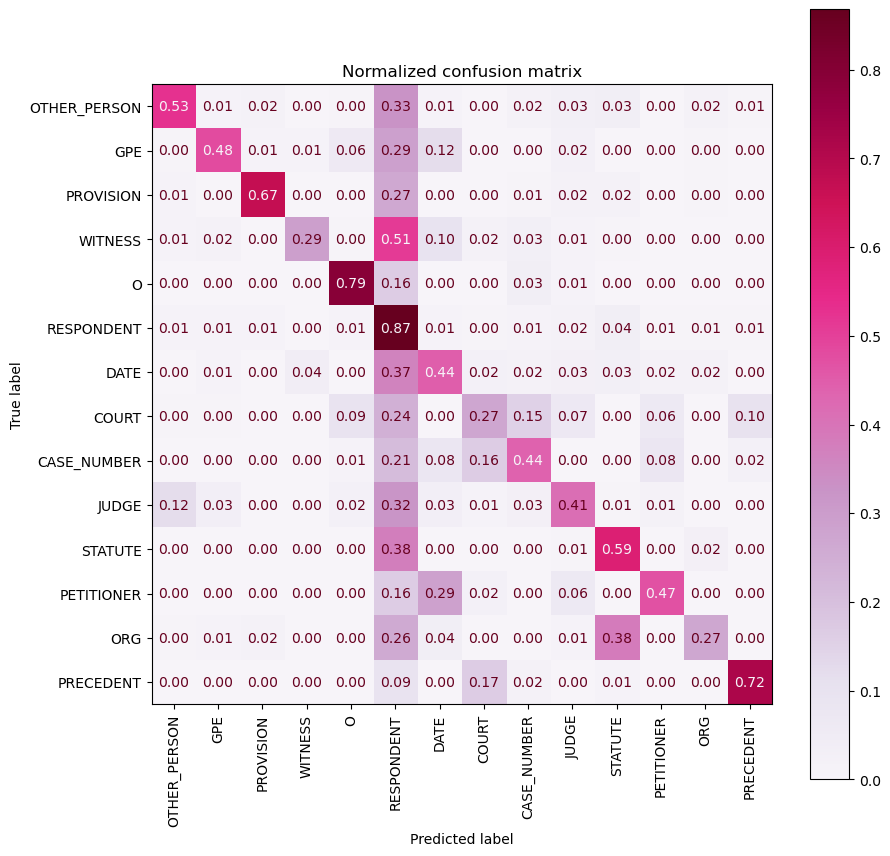

In [32]:
plot_confusion_matrix(y_preds, y_test, labels)